In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris, load_boston, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, LogisticRegression, ElasticNet)

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score, classification_report, confusion_matrix)


import string
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Menggunakan dataset credit_scoring_bank_cimb.csv, lakukan regresi kalau perlu lakukan feature engineering

In [2]:
df = pd.read_csv("https://github.com/kevinnkevinn/portfoliodatascience/raw/main/Data%20Source/credit_scoring_bank_cimb.xlsx%20-%20data.csv")
df = pd.DataFrame(data = df)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   kode_kontrak             900 non-null    object
 1   pendapatan_setahun_juta  900 non-null    int64 
 2   kpr_aktif                900 non-null    object
 3   durasi_pinjaman_bulan    900 non-null    int64 
 4   jumlah_tanggungan        900 non-null    int64 
 5   rata_rata_overdue        900 non-null    object
 6   risk_rating              900 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 49.3+ KB


In [4]:
df["kpr_aktif"] = df["kpr_aktif"].astype("category")
df["kpr_aktif"]

0         YA
1         YA
2      TIDAK
3         YA
4      TIDAK
       ...  
895       YA
896       YA
897    TIDAK
898    TIDAK
899    TIDAK
Name: kpr_aktif, Length: 900, dtype: category
Categories (2, object): ['TIDAK', 'YA']

In [5]:
for i in df["kpr_aktif"]:
  if i == "YA":
    i = 1
    if i == "TIDAK":
      i = 0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   kode_kontrak             900 non-null    object  
 1   pendapatan_setahun_juta  900 non-null    int64   
 2   kpr_aktif                900 non-null    category
 3   durasi_pinjaman_bulan    900 non-null    int64   
 4   jumlah_tanggungan        900 non-null    int64   
 5   rata_rata_overdue        900 non-null    object  
 6   risk_rating              900 non-null    int64   
dtypes: category(1), int64(4), object(2)
memory usage: 43.3+ KB


Mencari korelasi


In [7]:
df.corr().abs()

,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating
pendapatan_setahun_juta,1.000000,0.052143,0.250064,0.144934
durasi_pinjaman_bulan,0.052143,1.000000,0.028773,0.237424
jumlah_tanggungan,0.250064,0.028773,1.000000,0.762335
risk_rating,0.144934,0.237424,0.762335,1.000000


Memisahkan dataset dan data training

In [8]:
import numpy as np 
import sklearn.model_selection as ms
x = df[["pendapatan_setahun_juta", "durasi_pinjaman_bulan", "jumlah_tanggungan"]]
y = df[["risk_rating"]]
x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.2, random_state=0) 
print(x_train.size, x_test.size)

2160 540


Grafik hubungan variabel x dan variabel y

**Linier Regression**

In [9]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [10]:
linreg_coef = linreg.coef_
print("Koefisien regresi \n {}".format(linreg_coef))

Koefisien regresi 
 [[-0.00073752  0.0208944   0.49649688]]


In [11]:
linreg_score = linreg.score(x_test, y_test)
print("R2 model {:.2%}".format(linreg_score))

R2 model 59.97%


In [12]:
linreg_prediction = linreg.predict(x_test[:1])
print("Prediksi pada indeks data pertama: {}".format(
    float(linreg_prediction)
))

Prediksi pada indeks data pertama: 1.6152366945085792


**R-Square**

In [13]:
r2 = r2_score(y_true=y_test, 
                     y_pred=linreg.predict(x_test))
r2

0.5996613956915435

Hasil dari R-Sqaure yaitu -0.015 dimana masih lemah sehingga dapat dikatakan model nya tidak sesuai. 

Melihat skor

In [14]:
x_test.head()

,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
492,159,48,0
141,215,12,0
409,97,48,3
31,129,12,0
570,265,24,5


In [15]:
y_test.head()

,risk_rating
492,2
141,1
409,3
31,2
570,4


Ridge Regression

In [16]:
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)

Ridge()

In [17]:
ridge_coef = ridge.coef_
print("Koefisien ridge \n {} \n".format(ridge_coef))

Koefisien ridge 
 [[-0.00073582  0.02089432  0.49631593]] 



In [18]:
ridge_score = ridge.score(x_test, y_test)
print("R2 model {:.2%}".format(ridge_score))

R2 model 59.97%


In [19]:
ridge_prediction = ridge.predict(x_train[:1])
print("Prediksi pada indeks data pertama: {}".format(
    float(ridge_prediction)
))

Prediksi pada indeks data pertama: 2.1076576462440597


Lasso Regression

In [20]:
lasso = Lasso(alpha=1.0) # Parameter alpha harus lebih dari 0
lasso.fit(x_train, y_train)

Lasso()

In [21]:
lasso_coef = lasso.coef_
print("Koefisien lasso \n {} \n".format(lasso_coef))

Koefisien lasso 
 [0.00124245 0.01555203 0.23657318] 



In [22]:
lasso_score = lasso.score(x_test, y_test)
print("R2 model {:.2%}".format(lasso_score))

R2 model 46.93%


In [23]:
lasso_prediction = lasso.predict(x_test[:1])
print("Prediksi pada indeks data pertama: {}".format(
    float(lasso_prediction)
))

Prediksi pada indeks data pertama: 2.2698489523391796


Elastic Net Regression

In [24]:
enet = ElasticNet(alpha=1.0, l1_ratio=0.5) # Parameter alpha harus lebih dari 0
enet.fit(x_train, y_train)

ElasticNet()

In [25]:
enet_coef = enet.coef_
print("Koefisien elastic net \n {} \n".format(enet_coef))

Koefisien elastic net 
 [0.0006522  0.01819197 0.32400967] 



In [26]:
enet_score = enet.score(x_test, y_test)
print("R2 model {:.2%}".format(enet_score))

R2 model 54.83%


In [27]:
enet_prediction = enet.predict(x_test[:1])
print("Prediksi pada indeks data pertama: {}".format(
    float(enet_prediction)
))

Prediksi pada indeks data pertama: 2.0645112603730595


Perbandingan antar Skor

In [28]:
pd.DataFrame(
    data={
        "Score": [linreg_score, ridge_score, lasso_score, enet_score]
    },
    index=["Linreg", "Ridge", "Lasso", "Elastic Net"]
)

,Score
Linreg,0.599661
Ridge,0.599674
Lasso,0.469254
Elastic Net,0.548272


K-Nearest Neighbours 

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(x, y)

C:\Users\Kevin Kiding\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [31]:
knn_score = neigh.score(x_test, y_test)
print("Akurasi model {:.2%}".format(knn_score))

Akurasi model 63.33%


C:\Users\Kevin Kiding\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


**Evaluasi Model**

R-Squared (MAE)

In [32]:
r2 = r2_score(y_true=y_test, 
                     y_pred=linreg.predict(x_test))
r2

0.5996613956915435

Perhitungan dengan RMSE

In [33]:
sample_mse = mean_squared_error(y_true=y_test,
                                y_pred=linreg.predict(x_test))
sample_rmse = np.math.sqrt(sample_mse)
sample_rmse

0.8334562130813982

Melakukan perhitungan dengan MSE dimana dapat dilakukan dengan mengkuadratkan nilai RMSE

In [34]:
MSE = sample_rmse ** 2
MSE

0.694649259123985

Jadi nilai MSE pada dari model regresi yaitu 0.711

# 2.Lalu gunakan PCA pada feature (variable) dan gunakan hanya pca1, pca2, pca3 dan pca4

In [35]:
!pip install apyori

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=6b1902477a1b3f0596861eb4d66ef378ce87d0a51ad27cbb4f5ad5744bdc750f
  Stored in directory: c:\users\kevin kiding\appdata\local\pip\cache\wheels\32\2a\54\10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori


In [36]:
!pip install mlxtend

     ---------------------------------------- 1.3/1.3 MB 2.2 MB/s eta 0:00:00


Melakukan standarisasi

In [38]:
data = pd.read_csv("https://github.com/kevinnkevinn/portfoliodatascience/raw/main/Data%20Source/credit_scoring_bank_cimb.xlsx%20-%20data.csv")
data.head()

,kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,AGR-000001,295,YA,48,5,61 - 90 days,4
1,AGR-000011,271,YA,36,5,61 - 90 days,4
2,AGR-000030,159,TIDAK,12,0,0 - 30 days,1
3,AGR-000043,210,YA,12,3,46 - 60 days,3
4,AGR-000049,165,TIDAK,36,0,31 - 45 days,2


In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
data_prediktor = ["pendapatan_setahun_juta", "durasi_pinjaman_bulan", "jumlah_tanggungan"]
x = data[data_prediktor].values
y = data["risk_rating"].values

In [41]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [42]:
x_std = scaler.transform(x)

In [43]:
new_df = pd.DataFrame(data = x_std, columns = data_prediktor)

In [44]:
new_df.describe()

,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
count,9.000000e+02,9.000000e+02,9.000000e+02
mean,9.054486e-17,-7.130099e-17,1.437122e-17
std,1.000556e+00,1.000556e+00,1.000556e+00
min,-1.800328e+00,-1.312414e+00,-1.461477e+00
25%,-8.164250e-01,-1.312414e+00,-9.630575e-01
50%,-2.544428e-02,-4.342187e-01,3.378178e-02
75%,6.883675e-01,1.322171e+00,1.030621e+00
max,2.636881e+00,1.322171e+00,1.529041e+00


Melakukan PCA

In [45]:
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components = 3)
pca.fit(x_std)

PCA(n_components=3)

In [47]:
pca1 = pca.transform(x_std)
pca1

array([[ 2.4384016 ,  1.2313339 , -1.34241003],
       [ 2.16842002,  0.42313996, -0.83295915],
       [-0.99387992, -1.56072111, -0.66455998],
       ...,
       [-0.25923012, -0.52079601, -0.26207039],
       [-0.66396632,  0.93348432, -1.72317363],
       [ 0.26194656, -0.59638736, -0.7720727 ]])

In [48]:
pdf = pd.DataFrame(data = pca1, columns = ["pca1", "pca2", "pca3"])

In [49]:
pdf["risk_rating"] = y

In [50]:
pdf.describe()

,pca1,pca2,pca3,risk_rating
count,9.000000e+02,9.000000e+02,9.000000e+02,900.000000
mean,-5.927357e-17,8.141636e-18,1.418618e-17,2.681111
std,1.119184e+00,1.006232e+00,8.592219e-01,1.294928
min,-2.378363e+00,-1.701958e+00,-2.112386e+00,1.000000
25%,-8.158072e-01,-9.733099e-01,-6.508332e-01,1.000000
50%,-8.090082e-02,1.607512e-02,-4.588208e-02,3.000000
75%,6.623608e-01,9.552397e-01,6.045529e-01,3.000000
max,2.901358e+00,1.752011e+00,2.165761e+00,5.000000


<BarContainer object of 3 artists>

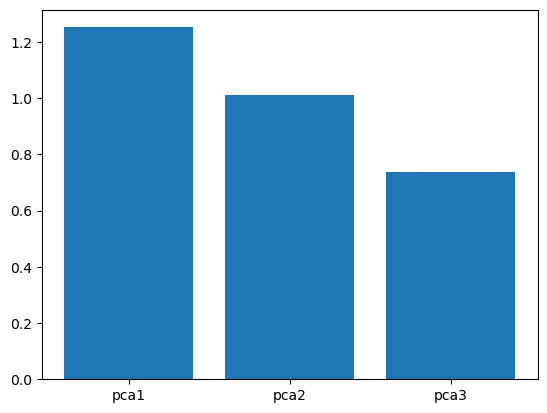

In [51]:
plt.bar(["pca1", "pca2", "pca3"], pca.explained_variance_)

<BarContainer object of 3 artists>

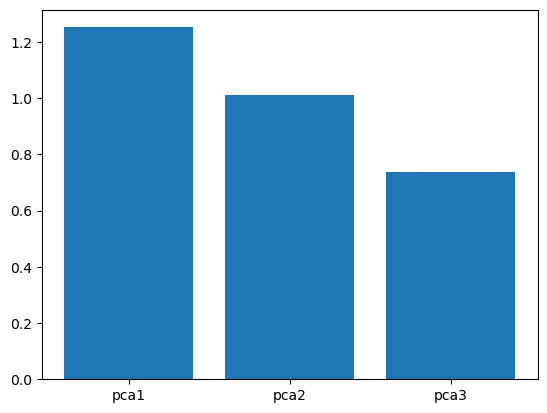

In [52]:
plt.bar(["pca1", "pca2", "pca3"], pca.explained_variance_)

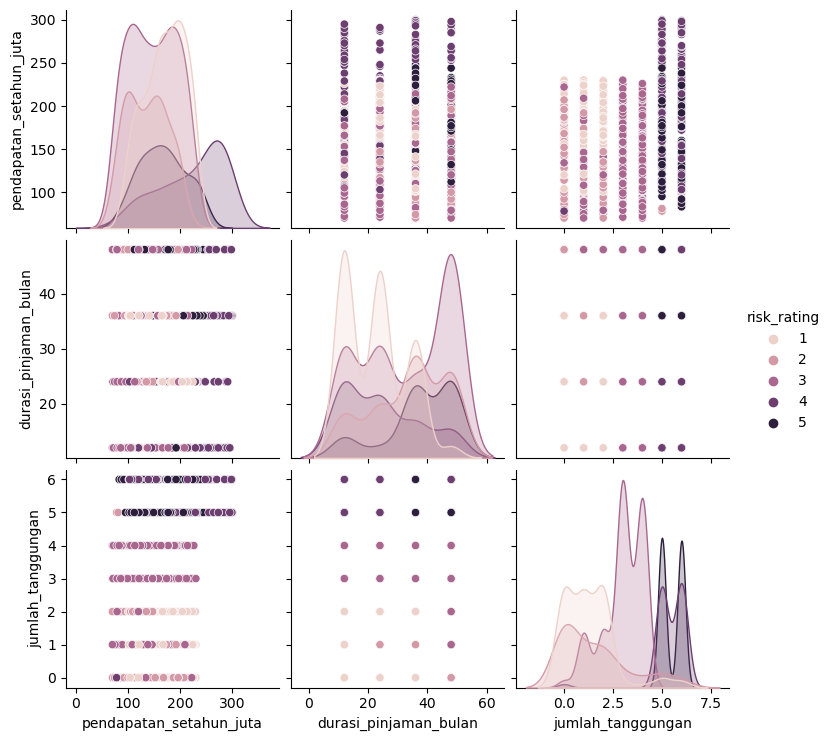

In [53]:
sns.pairplot(data = df, hue = "risk_rating", diag_kind = "kde")

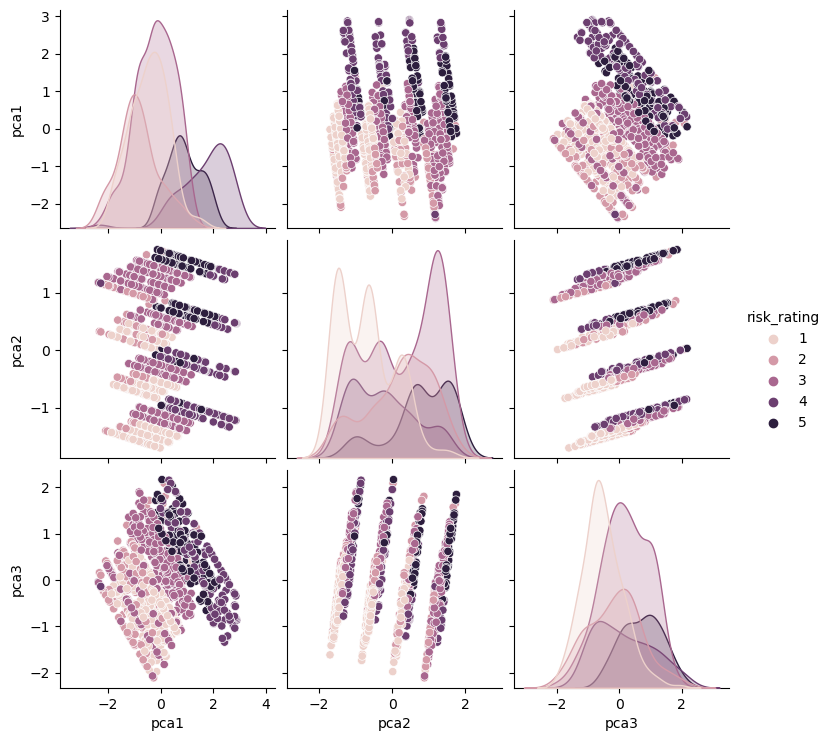

In [54]:
sns.pairplot(data = pdf, hue = "risk_rating", diag_kind = "kde")

# 3. tampilkan metode evaluasi dengan menunjukan nilai MSE dari model PCA, Apakah lebih baik atau lebih buruk dari regresi? Dan mengapa?

Melakukan regresi dari model PCA

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.DataFrame(data = pca1, columns = ["pca1", "pca2", "pca3"])
df.shape

(900, 3)

In [57]:
import sklearn.model_selection as ms # mengimport modul model_selection dari Scikit-Learn
x = df[["pca1", "pca2"]] 
y = df[["pca3"]] 
x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.2, random_state=0) # untuk memsiahkan training dataset dengan test dataset. ms.train_test_split akan menghasil 4 buah NumPy array dimana 2 untuk training dataset dan 2 untuk test dataset. test_size=0.2 itu artinya 20% dari seluruh isi DataFrame df1 akan dijadikan test dataset. 
print(x_train.size, x_test.size)

1440 360


Mencari MSE (dimana nilai RMSE yang dikuadratkan)

In [58]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [59]:
linreg_coef = linreg.coef_
print("Koefisien regresi \n {}".format(linreg_coef))

Koefisien regresi 
 [[ 0.02291529 -0.02152357]]


In [60]:
linreg_score = linreg.score(x_test, y_test)
print("R2 model {:.2%}".format(linreg_score))

R2 model -1.51%


In [61]:
linreg_prediction = linreg.predict(x_test[:1])
print("Prediksi pada indeks data pertama: {}".format(
    float(linreg_prediction)
))

Prediksi pada indeks data pertama: -0.052697521343953564


In [62]:
sample_mse = mean_squared_error(y_true=y_test,
                                y_pred=linreg.predict(x_test))
sample_rmse = np.math.sqrt(sample_mse)
sample_rmse

0.8432401514429982

Mencari nilai MSE. Yang di dapat dari nilai RMSE yang dikuadratkan

In [63]:
RMSE = sample_rmse ** 2
RMSE

0.7110539530056106

Jadi hasilnya RMSE adalah 0.711

Kalau dilihat pada nilai MSE pada model regresi dan model PCA memiliki nilai yang sama yakni 0.711.